In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns. set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. preprocessing import LabelEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn. neural_network import MLPClassifier
from xgboost import XGBRegressor
import sklearn
print(sklearn.__version__)

from sklearn. metrics import confusion_matrix
#from sklearn. metrics import plot_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings (action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn. linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor

1.3.2


In [2]:
import sklearn
print(sklearn.__version__)

1.3.2


In [3]:
df=pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [7]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Density'>

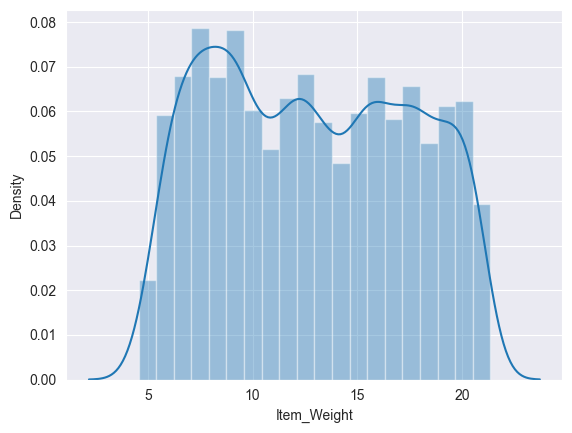

In [9]:
sns.distplot(df['Item_Weight'])

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
print(df.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


<Axes: xlabel='Item_Weight', ylabel='Density'>

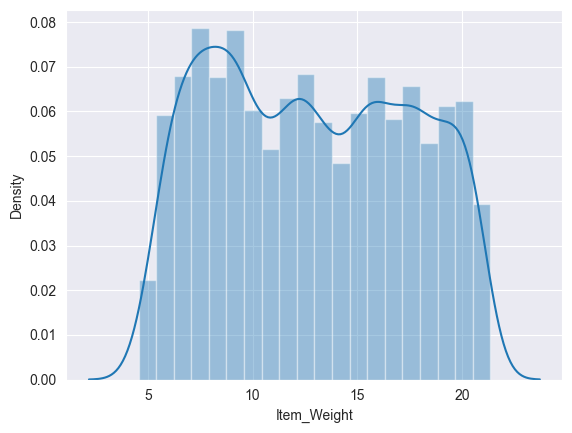

In [11]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

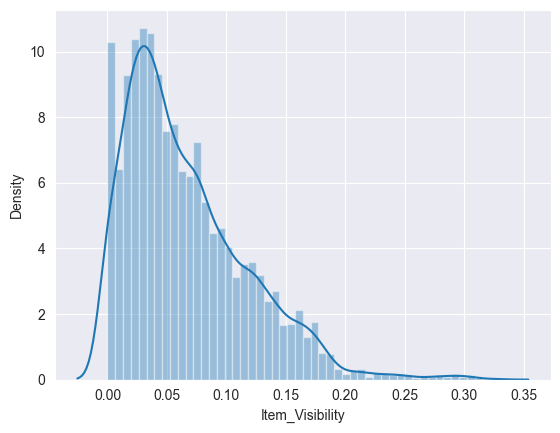

In [12]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

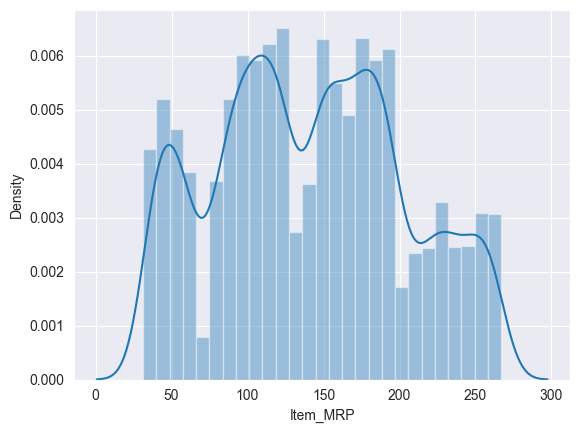

In [13]:
sns.distplot(df['Item_MRP'])

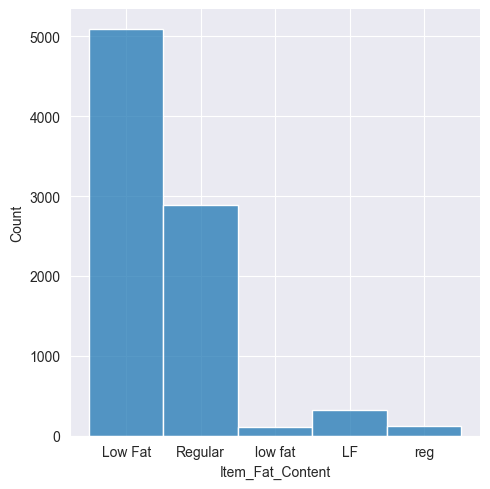

In [14]:
sns.displot(df['Item_Fat_Content'])

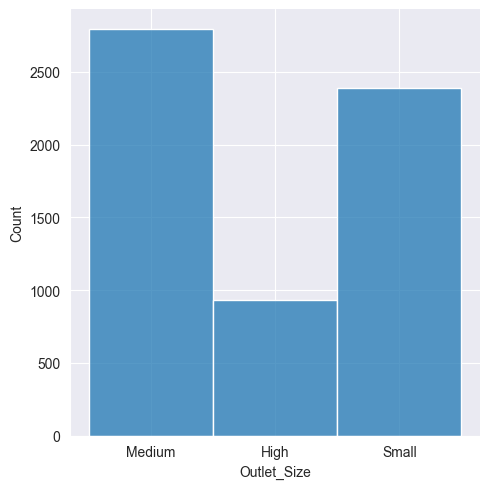

In [15]:
sns.displot(df['Outlet_Size'])

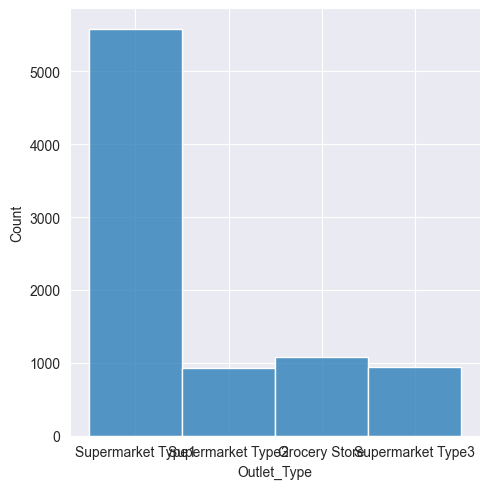

In [16]:
sns.displot(df['Outlet_Type'])

In [17]:
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier']
for col in cat_col:
  df[col]=le.fit_transform(df[col])
df['Item_Weight']=le.fit_transform(df['Item_Weight'])
# for i in df.columns:
#   df[i]=le.fit_transform(df[i])
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [18]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [19]:
# X=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Item_Outlet_Sales'])
X=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [20]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,284,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,57,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,375,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,392,2,0.000000,6,182.0950,0,1998,3,2,0
4,1297,265,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,233,2,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,299,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,149,2,0.145221,13,103.1332,3,2009,1,2,2


In [21]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()
print(X_scaled.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
base_model= LinearRegression()
base_model. fit(X_train,Y_train)
base_model. score(X_val, Y_val)

0.5097416403302725

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
pred=base_model.predict(X_val)
print(mean_squared_error(Y_val, pred))
r2_LM=r2_score(Y_val, pred)
print(r2_score(Y_val, pred))

1373210.4921697404
0.5097416403302725


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def cross_validation (model) :
  kfold = KFold(n_splits=10, random_state=None)
  results = cross_val_score (model, X, y, cv=kfold)
  return results.mean()*100, results.std()*100
accuracy_LM, std_LM=cross_validation(base_model)
print (accuracy_LM, std_LM)

50.075706547553786 2.1391221444081276


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred = rf_reg.predict(X_val)

In [27]:
from sklearn. metrics import mean_squared_error, r2_score
r2_RF= r2_score(Y_val,Y_pred)
print (r2_RF)

from sklearn. ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor ()
rf_reg. fit(X_train, Y_train)
y_pred = rf_reg. predict (X_val)
r2_RF= r2_score (Y_val,y_pred)
print (r2_RF)

# accuracy_RF, std_rf=cross_validation (rf_reg)
# print (accuracy_RF, std_rf)


0.5570716464768932
0.5535106723144715


In [28]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,Y_train)
y_pred=model_xgb.predict(X_val)
r2_xgb=r2_score(Y_val,y_pred)
print(r2_xgb)

0.5189213776737861


In [29]:
accuracy_xgb,std_xgb=cross_validation(model_xgb)
print(accuracy_xgb,std_xgb)

51.22101544674666 3.439656820786599


In [30]:
m1=rf_reg.predict([[0,1.5,0,9,0,20,9,8,5,11,10]])
m1

array([4412.75595])

In [31]:
# Assuming rf_reg is your trained RandomForestRegressor model
feature_names = rf_reg.feature_importances_

print("Feature Names:", feature_names)


Feature Names: [0.06774889 0.11607019 0.01374523 0.08663658 0.0340894  0.43136712
 0.0169905  0.01984415 0.01073571 0.00544602 0.19732621]


In [32]:
import pickle
pickle.dump(rf_reg,open('big_mart.pkl','wb'))